# **Stroke Prediction**

Dataset - This dataset is used to predict a patient's likelihood of having a stroke based on input parameters such as gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

### **Attribute information**:
<ol>
<li>id :unique identifier</li>
<li>gender: "Male", "Female" or "Other"</li>
<li>age: age of the patient</li>
<li>hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension</li>
<li>heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
<li>ever_married: "No" or "Yes"</li>
<li>work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</li>
<li>Residence_type: "Rural" or "Urban"</li>
<li>avg_glucose_level: average glucose level in blood</li>
<li>bmi: body mass index</li>
<li>smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*</li>
<li>stroke: 1 if the patient had a stroke or 0 if not</li>
</ol>

## **Importing the necessary Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score,  classification_report
from sklearn.preprocessing import StandardScaler

### **Loading the dataset**

In [50]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Stroke is the target variable

In [51]:
print(df.shape)

(5110, 12)


The dataset includes a total of 5110 rows and 12 columns including the target variable 

## **Pre-Processing**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset consists of columns with categorical features. Thus encoding is needed

In [53]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Missing Values Handling**

In [54]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

'bmi' column has missing values

Missing values can be handling by filling the empty cells with median of bmi

In [55]:
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Apart from Male and Female there is a 3rd classification. Since there is no chance to know whether the other gender is Female or Male because bmi for both of them is similar This can be removed.

In [57]:
df = df[df['gender'] != 'Other']

### **Checking for duplicate rows**

In [58]:
#Check duplicate rows in data
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape[0])

Number of duplicate rows ::  0


### **Checking correlation of features**

<AxesSubplot:>

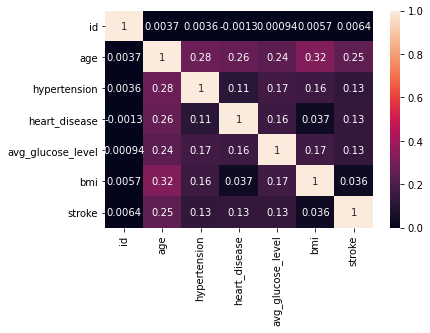

In [59]:
sns.heatmap(data = df.corr(),annot=True)


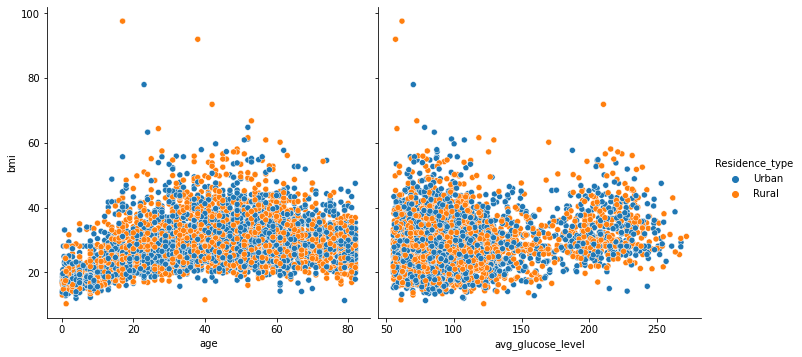

In [60]:
sns.pairplot(data=df, y_vars='bmi', x_vars=['age', 'avg_glucose_level'], hue='Residence_type',
             height=5)

From the plot above we can see that people mostly has the bmi score in range from 10 to 60 and there is no difference for people who live in urban or rural area. All data are equally distributed.

We know that id column completely has no correlation to predict stroke. Furthermore, correlation between bmi and stroke is very low (under 0.05). So, we drop both of the features

In [61]:
df.drop(['id', 'bmi'], inplace=True, axis =1)

### **Checking outliers**

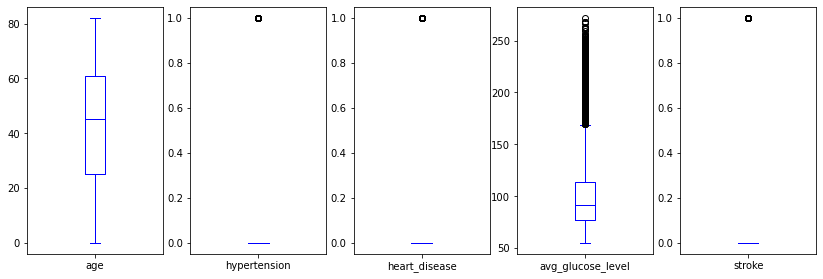

In [62]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

**Outlier Removal:**

In [63]:
cols = ['avg_glucose_level']  
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

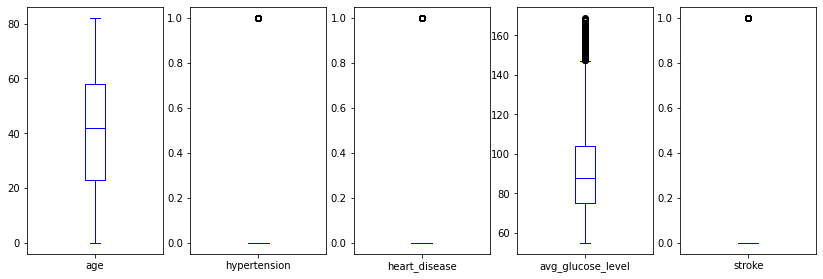

In [64]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='blue');

From the above plot we can see that the outliers have been remved.

# **Exploratory Data Analysis**

**Gender and Frequency of stroke**

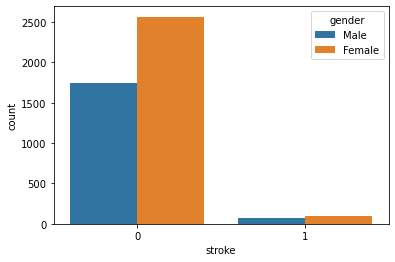

In [65]:
ax = sns.countplot(data=df, x='stroke', hue='gender')

If we look at the visualization, total number of female who got stroke is bigger than male

**Heart disease and the frequency of stroke**

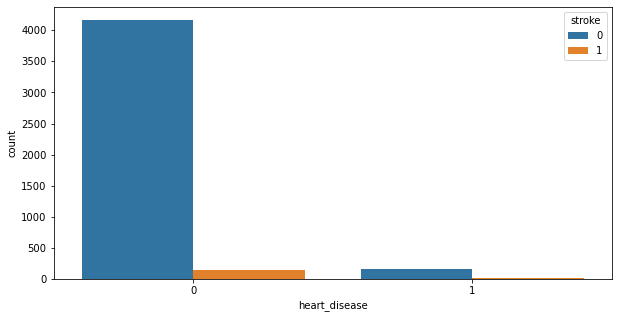

In [66]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'heart_disease', hue = 'stroke')
plt.show()

From the above count plot we can make a conclusion that heart disease and the frequency of stroke are not well correlated which means that a heart disease patient is not obviously prone to have a stroke. 

**Hypertension and the frequency of stroke**

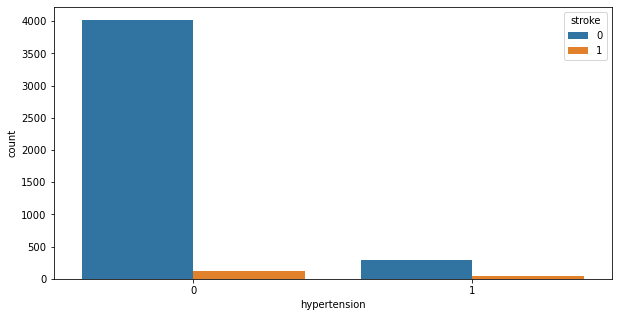

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'hypertension', hue = 'stroke')
plt.show()

From the above count plot we can make a conclusion that hypertension and the frequency of stroke are somewhat well correlated which means that a hypertension patient is prone to have a stroke and the chances are higher when compared to a heart disease patient as more than 25% of strok cases They had hypertension. 

**Work type and the frequency of stroke**

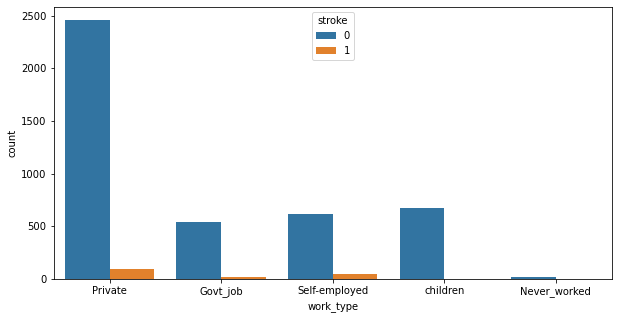

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x = 'work_type', hue = 'stroke')
plt.show()

From the above we can see that the people who work in the Private sectors are more prone to get a stroke than the people who are self employed  or working in a governemnt job  or have never worked or among children.

**Smoking status and the frequency of stroke**

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

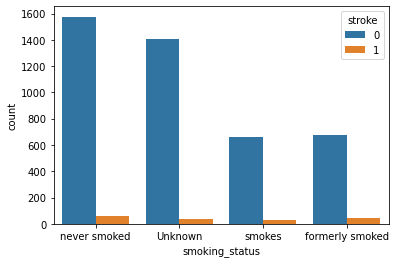

In [69]:
sns.countplot(data = df, x= 'smoking_status', hue = 'stroke')


The above show us there's unknown smoking status that might influence our model. Fortunately we got some insight from relation between smoking status and work type plot. As we can see that unknown status has a big number of children and we can assume that children never smoke. So, with that assumtion we can categorize unknown status to never smoked status

In [70]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [71]:
df['smoking_status'] = df['smoking_status'].apply(smoke)

<ipython-input-71-abf19e9474ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].apply(smoke)


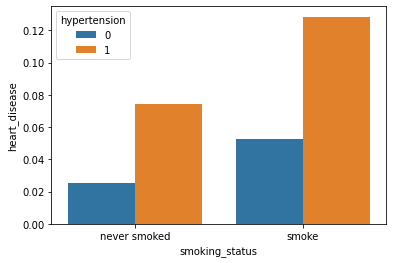

In [72]:
ax = sns.barplot(data=df, x='smoking_status', y='heart_disease', hue='hypertension', ci=None)

From the above plot it seems like heart disease is more likely to occur to someone with hypertension and smokers have more chance to get hypertension.

**Distribution of Stroke based on Gender**

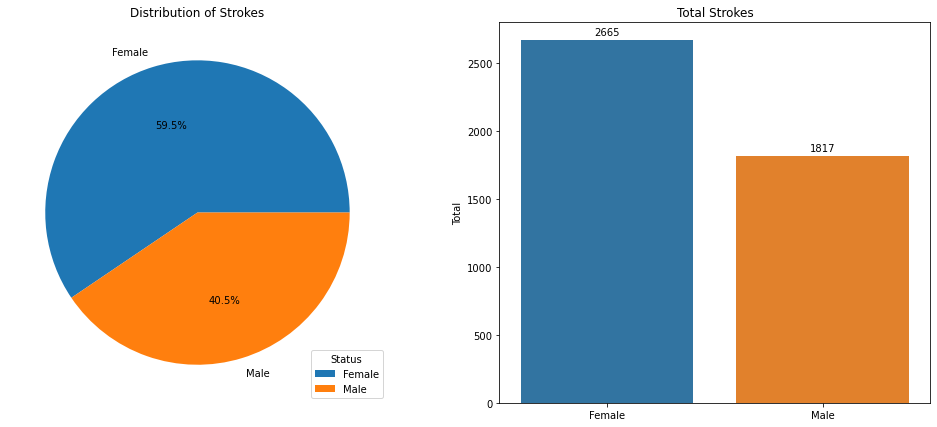

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.pie(x=df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
ax1.legend(
    title='Status',
    loc = 'lower right')
ax1.set_title('Distribution of Strokes')

plots = sns.barplot(x=df['gender'].value_counts().index, y=df['gender'].value_counts(), ax=ax2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
ax2.set_ylabel('Total')
ax2.set_title('Total Strokes')

plt.show()


The above 2 plots above show us the relationship between gender and stroke and we can clearly see that frequency of stroke is higher in number in female than in male.

**Distribution of Stroke Based on Age**

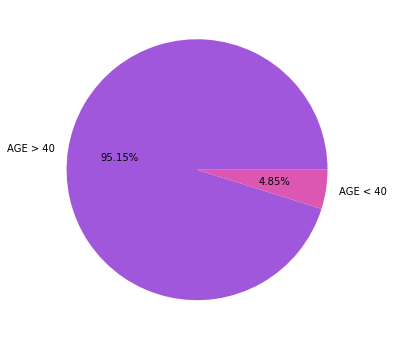

In [74]:
plt.figure(figsize=(6, 6))
classx = ['AGE > 40','AGE < 40']
colors = sns.color_palette("hls", 8)[6:8]
countx = [len(df.loc[(df.age > 40) & (df.stroke == 1)]),len(df.loc[(df.age <= 40) & (df.stroke == 1)])]
plt.pie(countx, labels = classx,colors=colors,autopct='%1.2f%%')
plt.show()

From the above plot we can see that people who have age > 40 are more prone to strokes.

**Bivariate Analysis**

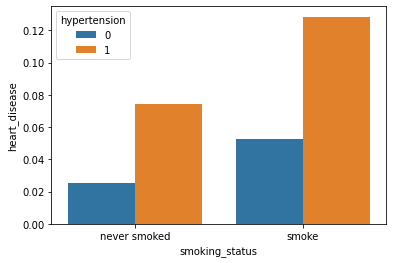

In [75]:
ax = sns.barplot(data=df, x='smoking_status', y='heart_disease', hue='hypertension', ci=None)

Seems like heart disease is more likely to occur to someone with hypertension and smokers have more chance to get hypertension

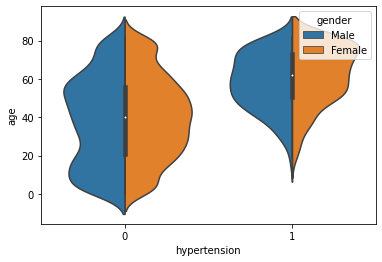

In [76]:
ax = sns.violinplot(data=df, x='hypertension', y='age', hue='gender', split=True)

C:\Users\jaseem\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


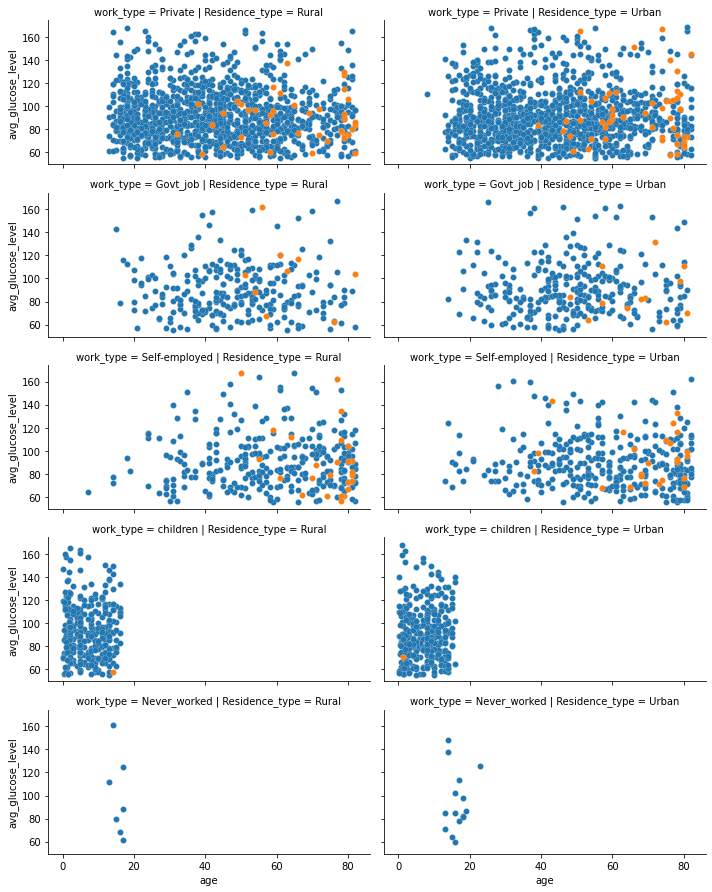

In [77]:
g = sns.FacetGrid(data=df, row='work_type', col='Residence_type', hue='stroke',
                  size=2.5, aspect=2)
g.map(plt.scatter, 'age', 'avg_glucose_level', edgecolor='#EAE0D5', lw=0.2)

Majority of people are around 40 and 60 years old.Older people more likely to get heart disease than people under 40 years old.People above 50 years old have more chance to get stroke.

From the above graph it is evident that Stroke doesn't look where people live. Distribution of stroke in the urban area is similar to rural area.
2 children have stroke

### **Encoding**

Since the data have categorical values, this should be encoded.

In [78]:
from sklearn.preprocessing import LabelEncoder


In [79]:
obj_feat = df.dtypes[df.dtypes == 'O'].index.values
le = LabelEncoder()

for i in obj_feat:
    df[i] = le.fit_transform(df[i])

<ipython-input-79-89b2b6012b39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


In [80]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,0,1
6,1,74.0,1,1,1,2,0,70.09,0,1
7,0,69.0,0,0,0,2,1,94.39,0,1
8,0,59.0,0,0,1,2,0,76.15,0,1
9,0,78.0,0,0,1,2,1,58.57,0,1


### **Standardization**

In [81]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [82]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# **Modelling**

In [84]:
all_model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), SVC()]

In [85]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

In [86]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'SVC']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score

,Model,Accuracy,Recall
0,LogisticRegression,0.963661,0.000000
1,KNeighborsClassifier,0.961428,0.000000
2,DecisionTreeClassifier,0.933057,0.112879
3,RandomForestClassifier,0.960791,0.000000
4,SVC,0.963661,0.000000


SVC has the highest accurancy, but Decision tree has higest recall. Lets try and fine tune the model

## **Model Fine Tuning**

Using GridSearchCV to find best parameter for SVC (Tuning SVC)

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1 , 1 , 10 , 100 , 1000],
    'gamma' : [1 , 0.1 , 0.01 , 0.001 , 0.0001],
    'kernel' : ['rbf']
}

grid = GridSearchCV(SVC() , param_grid , refit = True , verbose = 3)

grid.fit(X_train , y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.7s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.9s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [88]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

**Applying SVC with best parameter we get from GridSearchCV**

In [89]:
from sklearn.svm import SVC
model_svc = SVC(C=0.1 , gamma = 1 , kernel = 'rbf')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [90]:
model_svc.score(X_test,y_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1294
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1345
   macro avg       0.48      0.50      0.49      1345
weighted avg       0.93      0.96      0.94      1345



C:\Users\jaseem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaseem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaseem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree

In [91]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [92]:
print(confusion_matrix(y_test, pred, labels=(1,0)))
print(classification_report(y_test, pred))

[[   8   43]
 [  64 1230]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1294
           1       0.11      0.16      0.13        51

    accuracy                           0.92      1345
   macro avg       0.54      0.55      0.54      1345
weighted avg       0.93      0.92      0.93      1345



# **Prediction**

**Using SVC**

In [93]:
def prediction(feat_value):
    scaled = scaler.transform(feat_value)
    return model_svc.predict(feat_value)

In [94]:
prediction([[1, 65, 1, 0, 1, 3, 1, 200, 1]])

array([0], dtype=int64)

**Using Decision Tree**

In [95]:
def prediction(feat_value):
    scaled = scaler.transform(feat_value)
    return dtc.predict(feat_value)

In [96]:
prediction([[1, 65, 1, 0, 1, 3, 1, 200, 1]])

array([1], dtype=int64)

# Conclusion

In this entire work, we build a machine learning model to predict whether someone has high risk of getting stroke or not. We decided using SVC as it has the highest accuracy and then also using Decision Tree Classifier since it has the highest recall score and good accuracy score as well. From analysis we did earlier from our model, glucose level in the body and age have the main role to determine the output